In [1]:
import pandas as pd 
import numpy as np


In [2]:
import sys
sys.path.append("..")  
import ST_calc as ST
from ST_calc import plot_calc

In [3]:
AOMIC = 'https://s3.amazonaws.com/openneuro.org/ds003097/participants.tsv?versionId=9gylMj_lF7dOQFiiUSuQ4OeHtgxzGUtv'
AOMIC = pd.read_csv(AOMIC, sep='\t')
AOMIC.to_csv('AOMIC_dataset_ds003097.csv', sep=',', index=False)

In [4]:
na_percentage = AOMIC.isna().mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

religious_importance    78.771552
sexual_attraction_M     40.301724
sexual_attraction_F     40.301724
gender_identity_M       40.301724
gender_identity_F       40.301724
dtype: float64

In [5]:
suda = pd.read_csv('data_ds003097/SUDA_ds003097.csv', sep=',')
pif = pd.read_csv('data_ds003097/PIF_ds003097.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds003097/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds003097/normalized_difference.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds003097/k-combined-all-2-11.csv', sep=',')


In [405]:
AOMIC

,participant_id,age,sex,handedness,BMI,education_level,background_SES,IST_fluid,IST_memory,IST_crystallised,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
0,sub-0001,22.00,female,right,23,medium,2.0,77.0,49.0,33.0,...,7.0,1.0,1.0,7.0,no,yes,2.0,6.312,6.312,6.312
1,sub-0002,21.75,female,right,20,medium,5.5,97.0,63.0,39.0,...,7.0,1.0,2.0,7.0,no,no,NaN,NaN,6.311,6.311
2,sub-0003,25.25,female,right,31,high,3.0,122.0,67.0,38.0,...,6.0,3.0,1.0,6.0,no,no,NaN,6.312,6.312,6.312
3,sub-0004,22.50,female,right,20,high,5.0,149.0,69.0,52.0,...,6.0,2.0,1.0,7.0,yes,no,NaN,6.311,6.311,6.311
4,sub-0005,22.25,male,right,23,high,4.5,112.0,57.0,43.0,...,1.0,7.0,6.0,1.0,no,no,NaN,6.311,6.311,6.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,sub-0924,22.25,male,right,21,medium,3.0,136.0,56.0,54.0,...,2.0,6.0,4.0,4.0,no,no,NaN,6.374,6.374,6.374
924,sub-0925,25.25,male,right,30,medium,4.0,64.0,37.0,49.0,...,1.0,7.0,7.0,1.0,no,no,NaN,6.311,6.311,6.311
925,sub-0926,20.75,male,right,22,high,2.0,84.0,44.0,33.0,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.312,6.312,6.312
926,sub-0927,24.25,female,right,35,medium,2.5,98.0,57.0,35.0,...,7.0,2.0,1.0,7.0,no,no,NaN,6.311,6.311,6.311



        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.76
Kendall's Tau between suda & pif: 0.61, p-value: 0.0000


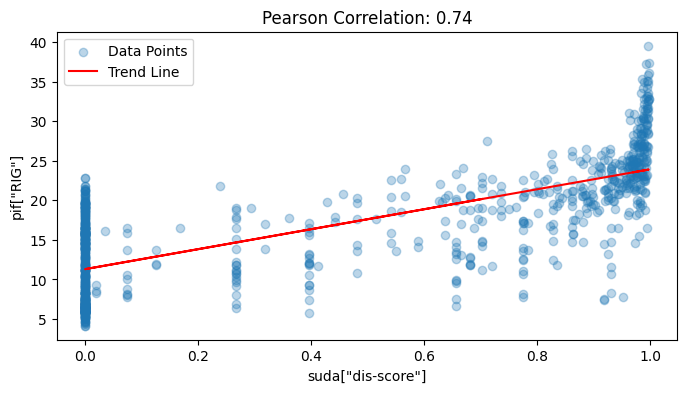

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.77
Pearson Correlation between K-combined & PIF field level: 0.37
Pearson Correlation between SUDA & K-combined field level: -0.09


Spearman Rank Correlation between PIF & SUDA: 0.82
Spearman Rank Correlation between PIF & K: 0.11
Spearman Rank Correlation between SUDA & K: -0.01


In [6]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

# WHOLE DATASET RISK VALUE SUM

In [8]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, AOMIC, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: -0.57
Pearson correlation to Suda sum & K-combined -0.15762058021106298
________________________________________________________________________
Pearson Correlation: -0.15762058021106298


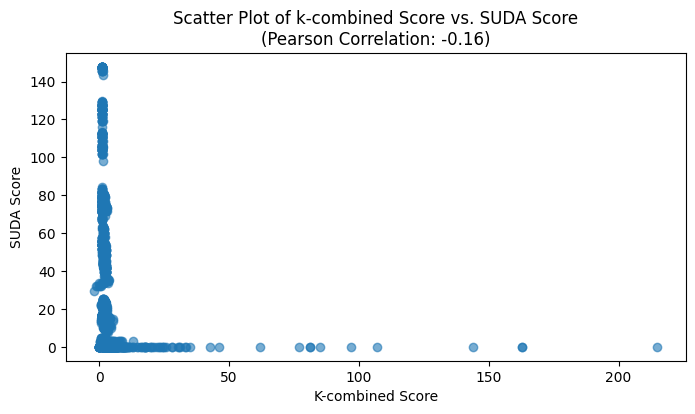

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: -0.59
Pearson correlation to PIF 95% & K-combined -0.25327000411583034


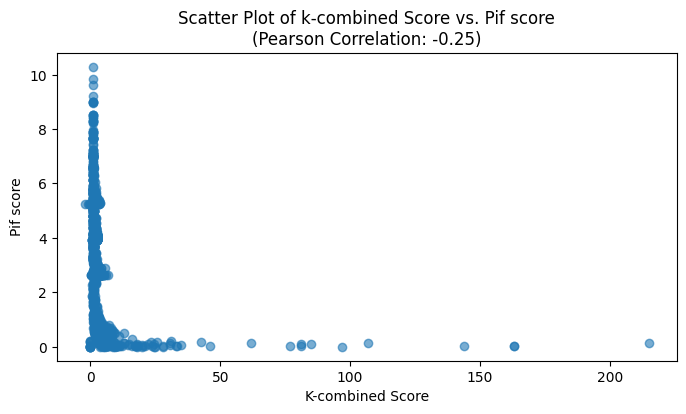

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.91
Pearson correlation to PIF 95% & SUDA 0.8280292701096662


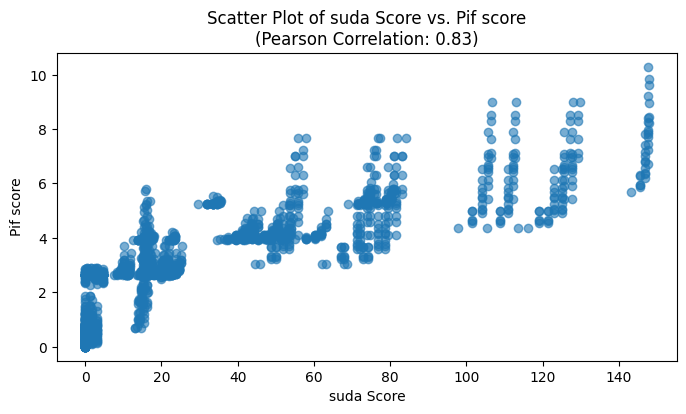

In [9]:
plot_calc(sum_score_df)